In [ ]:
if tensorflow fucks up just downgrade python to 3.10 or lower (already given with this), remove current python from setting/apps/installed apps/python x.x
once removed install given python, make sure to tick add exe to path during installation coz if not it sucks 
open cmd type py --version to confirm it, if wrong you messed up somewhere dude, try again!
then for libraries just paste below lines in cmd after version confirmation
py -m pip install tensorflow pandas numpy matplotlib scikit-learn
py -m pip install ipykernel
py -m ipykernel install --user --name=python310 --display-name "Python 3.10 (TensorFlow)"
it will install libs and create a kernal, now when creating .ipynb file select this above kernal named Python 3.10 (TensorFlow) 
happy coding by wolf!

Epoch 1/300


C:\Users\Pratik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.8600 - mae: 0.7313 - val_loss: 0.5662 - val_mae: 0.6078
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6855 - mae: 0.6557 - val_loss: 0.4854 - val_mae: 0.5597
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5763 - mae: 0.5827 - val_loss: 0.4165 - val_mae: 0.5130
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4966 - mae: 0.5485 - val_loss: 0.3597 - val_mae: 0.4723
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4324 - mae: 0.5060 - val_loss: 0.3148 - val_mae: 0.4397
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3951 - mae: 0.4891 - val_loss: 0.2777 - val_mae: 0.4120
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4179 - mae: 0.5101 - val_loss: 0.2504 - val_mae: 0.3900
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3106 - mae: 0.4423 - val_loss: 0.2289 - val_mae: 0.3714
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3263 - mae: 0.

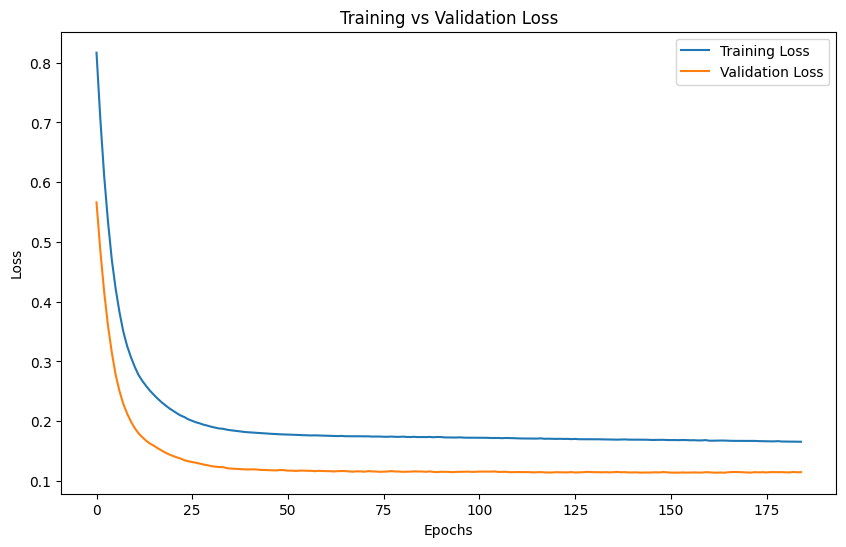

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


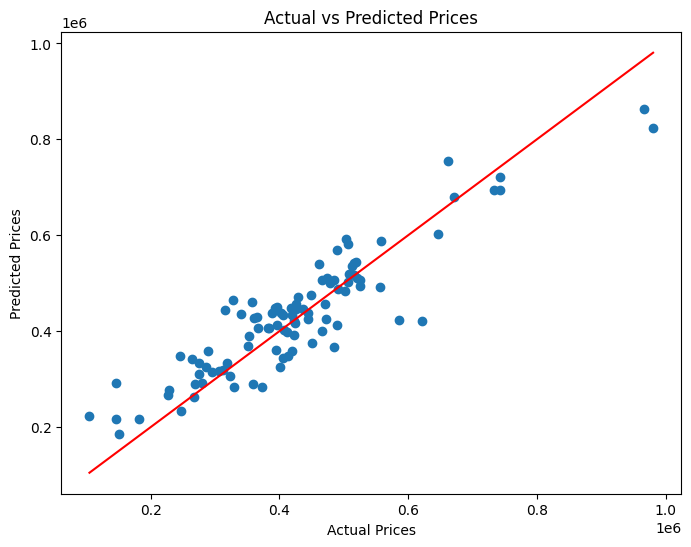

Actual: 401100.00 --- Predicted: 324621.84
Actual: 501900.00 --- Predicted: 482992.91
Actual: 319200.00 --- Predicted: 333274.25
Actual: 147000.00 --- Predicted: 292927.97
Actual: 247800.00 --- Predicted: 232801.41
Actual: 388500.00 --- Predicted: 437293.25
Actual: 266700.00 --- Predicted: 263664.56
Actual: 980700.00 --- Predicted: 823798.69
Actual: 367500.00 --- Predicted: 406918.50
Actual: 489300.00 --- Predicted: 570132.00


In [3]:
# Corrected: Linear Regression using DNN for small Boston Housing Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load your local dataset
data = pd.read_csv('housing.csv')  # <-- Update your filename/path if needed

# Step 3: Separate Features and Target
X = data[['RM', 'LSTAT', 'PTRATIO']]  # Input features
y = data['MEDV']                     # Target (Price)

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Normalize the data (both X and y)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

# Step 6: Build a simpler DNN model (small dataset = simple model)
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(1)  # Output layer, no activation
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()

# Step 7: Train the model
history = model.fit(
    X_train, y_train,
    epochs=300,
    validation_split=0.2,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]
)

# Step 8: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss (scaled): {loss:.4f}")
print(f"Test MAE (scaled): {mae:.4f}")

# Step 9: Plot Training History
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Step 10: Make Predictions (and Inverse Transform)
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1)).flatten()

# Step 11: Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Step 12: Print few predictions
for actual, pred in zip(y_true[:10], y_pred[:10]):
    print(f"Actual: {actual:.2f} --- Predicted: {pred:.2f}")